# ANCOVA with interactions in R

In this lesson, we will learn how to implement and interpret ANCOVA with interaction terms on real data in R.

(NEXT SLIDE)

Consider the data from a recent study on teacher training. The study was "designed to investigate the effect of a Facebook-based instructional approach on preservice teacher's learning achievement and engagement."
  
  (C. Saini and J. Abraham (2019). "Implementing Facebook-Based
Instructional Approach in Pre-Service Teacher Education: An Empirical 
Investigation," Computers & Education, Vol. 128, pp. 243-255.)

The variables are:

1. `pre_lrn`: Pre-Treatment learning achievement score

2. `Trt`: 1=Facebook Group,  0=Control

3. `post_lrn`: Post-Treatment learning achievement score




In [1]:
library(dplyr)
fb = read.table("http://users.stat.ufl.edu/~winner/data/facebook_teach.csv", sep = ",", header = TRUE)
#https://www.sciencedirect.com/science/article/pii/S0360131518302707#sec5

fb = fb %>%
    mutate(Trt = as.factor(Trt))

levels(fb$Trt) = c("control", "facebook")

head(fb); 

fb %>%
    group_by(Trt) %>%
    summarise(n_pre = n(), mean_pre = mean(pre_lrn), n_post = n(), mean_post = mean(post_lrn)) 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



pre_lrn,Trt,post_lrn
28.973,facebook,28.502
17.533,facebook,21.033
28.995,facebook,20.734
31.416,facebook,28.960
15.897,facebook,47.417
37.776,facebook,51.461


Trt,n_pre,mean_pre,n_post,mean_post
control,37,23.96995,37,34.26997
facebook,31,24.80997,31,41.42006


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


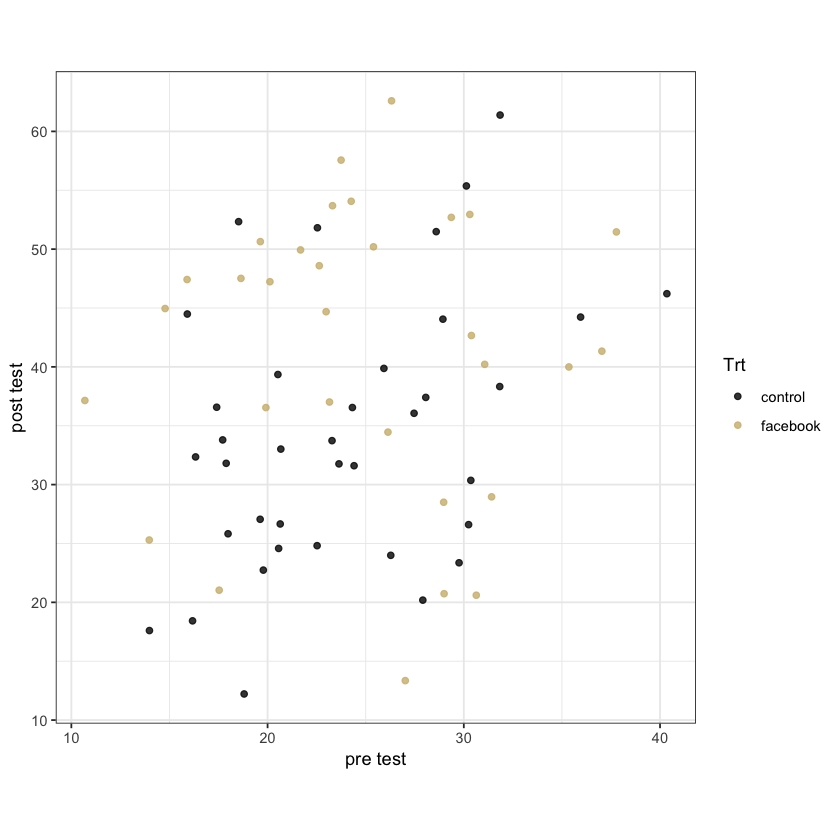

In [2]:
library(ggplot2)

p2 = ggplot(data = fb, aes(x = pre_lrn, y = post_lrn, color = Trt)) 
p2 = p2 + geom_point(alpha = 0.8)
p2 = p2 + scale_color_manual(values=c('black','#CFB87C')) 
p2 = p2 + xlab("pre test") + ylab("post test") + theme_bw() + coord_fixed(ratio = 0.6) 
#p2 = p2 + ggsave(filename = file.path("~/CU Google Drive/fig1.pdf"))

p2

Plotting the data by group, we do not get a great sense as to whether the least squares line going through the black points should have the same slope as the one going through the gold points. So, we can fit an ANCOVA model (in the regression form) with an interaction term. Here, we use the ${ \tt lm()}$ function with the same formula as normal linear regression. Our interaction term enters that formula with ${\tt Trt:pre_lrn}$.

In [3]:
ancova = lm(post_lrn ~  Trt + pre_lrn + Trt:pre_lrn, data = fb)
summary(ancova)


Call:
lm(formula = post_lrn ~ Trt + pre_lrn + Trt:pre_lrn, data = fb)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0246  -7.4198   0.0964   7.3837  22.1946 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)          16.0895     7.6817   2.095   0.0402 *
Trtfacebook          25.8308    11.0997   2.327   0.0231 *
pre_lrn               0.7585     0.3106   2.442   0.0174 *
Trtfacebook:pre_lrn  -0.7786     0.4403  -1.768   0.0818 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.49 on 64 degrees of freedom
Multiple R-squared:  0.1633,	Adjusted R-squared:  0.1241 
F-statistic: 4.165 on 3 and 64 DF,  p-value: 0.009307


Let's use the default $\alpha = 0.05$. First, our full F-test is signficant, which suggests that we need *some* of the terms in the model. Now, let's decide whether we need the interaction term. The t-test associated with the interaction term is not significant at the 0.05 level. That suggests that we could leave the interaction term out. The ${\tt anova()}$ function would yield the same result.

In [4]:
anova(ancova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Trt,1,862.3384,862.3384,6.527611,0.01300978
pre_lrn,1,375.0380,375.0380,2.838911,0.09687739
Trt:pre_lrn,1,413.1494,413.1494,3.127402,0.08175182
Residuals,64,8454.8020,132.1063,NA,NA


Now let's consider a plot of the lines over the data. 

(NEXT SLIDE)

Saving 7 x 7 in image


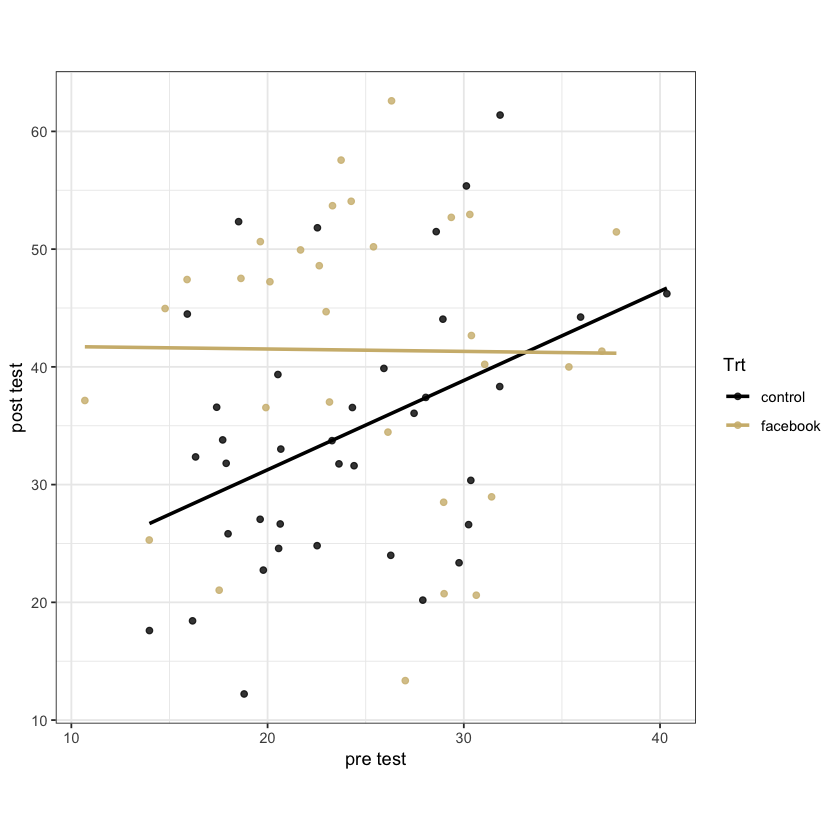

In [5]:
p2 = ggplot(data = fb, aes(x = pre_lrn, y = post_lrn, color = Trt)) 
p2 = p2 + geom_point(alpha = 0.8)
p2 = p2 + scale_color_manual(values=c('black','#CFB87C')) 
p2 = p2 + geom_smooth(method = "lm", se = F, alpha = 0.3) 
p2 = p2 + xlab("pre test") + ylab("post test") + theme_bw() + coord_fixed(ratio = 0.6) 
p2 = p2 + ggsave(filename = file.path("~/CU Google Drive/fig1.pdf"))

p2

#plot separate regression lines without ggplot
#with(fb, plot(pre_lrn,post_lrn, pch = 16, col = c("#CFB87C","#565A5C")[Trt]))
#abline(coef(lm(post_lrn[Trt == "control"] ~ pre_lrn[Trt == "control"], data = fb)), col = "#CFB87C")
#abline(coef(lm(post_lrn[Trt == "facebook"] ~ pre_lrn[Trt == "facebook"], data = fb)), col = "#565A5C")

This result might seem inconsistent with the test above! These lines clearly aren't parallel! However, let's plot the lines with the corresponding confidence bands:

Saving 7 x 7 in image


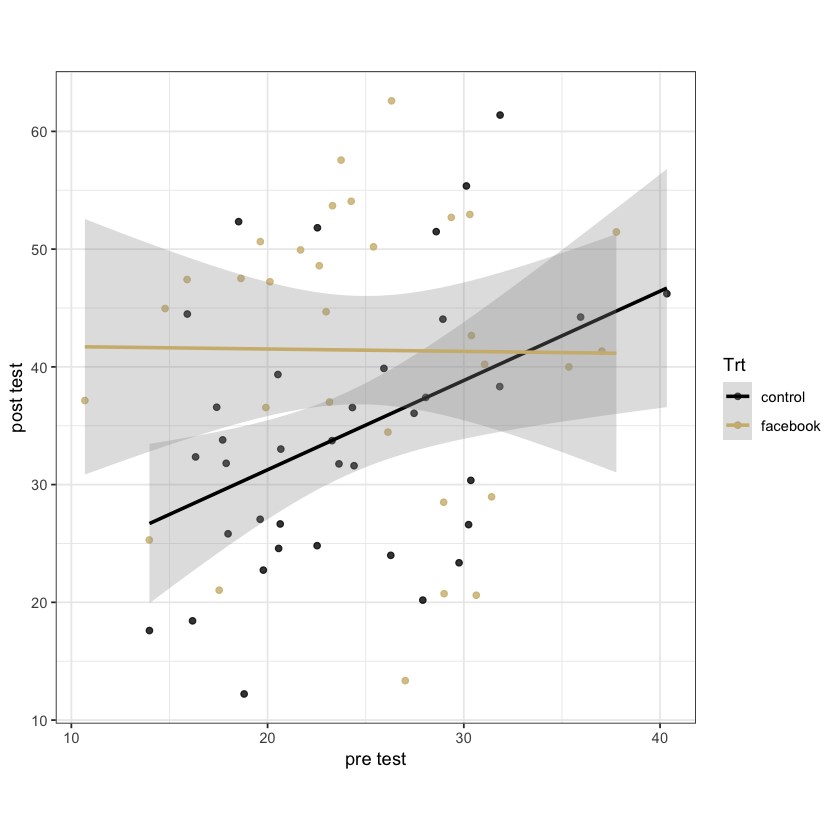

In [6]:
p2 = ggplot(data = fb, aes(x = pre_lrn, y = post_lrn, color = Trt)) 
p2 = p2 + geom_point(alpha = 0.8)
p2 = p2 + scale_color_manual(values=c('black','#CFB87C')) 
p2 = p2 + geom_smooth(method = "lm", se = T, alpha = 0.3) 
p2 = p2 + xlab("pre test") + ylab("post test") + theme_bw() + coord_fixed(ratio = 0.6) 
p2 = p2 + ggsave(filename = file.path("~/CU Google Drive/fig1.pdf"))

p2

Here, we notice that the confidence bands are relatively wide, which reflects the relatively high variability in the data (vertical stretch). Recall the interpretation of these confidence bands: if we resampled the post-test data (at the same values of the pre-test data and same values of the treatment), then we would get a different confidence band. If we did this over and over, then 95% of the bands would cover the true line.

Now, suppose that *this* band covers the true interval (after all, before calcuating it, there was a 0.95 probability...). That suggests that any line that we could draw within the band is "plausible". And, notice that it is possible to redraw the gold line and the black line so that they are parallel! So, while it seems as though the visual and statistical results are inconsistent, in a way, they're not. 
